In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

D:\python\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


Text(0.5, 1.0, 'Data will use')

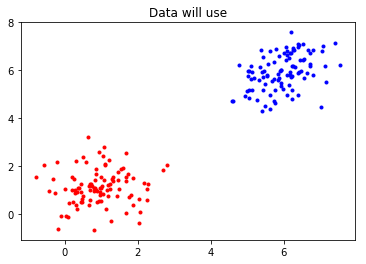

In [181]:
#generate data base, some random 2D-Gaussian distribution
mu0 = np.array([1,1])
mu1 = np.array([6,6])
sigma0 = np.array([[0.5,0],[0,0.5]])
sigma1 = np.array([[0.5,0.5],[0,0.5]])
gaussian_1 = np.random.multivariate_normal(mu0,sigma0,100)
gaussian_2 = np.random.multivariate_normal(mu1,sigma1,100)
data = np.vstack((gaussian_1,gaussian_2)) #the data I will use
plt.plot(gaussian_1[:,0],gaussian_1[:,1],'r.')
plt.plot(gaussian_2[:,0],gaussian_2[:,1],'b.')
plt.title('Data will use')

In [182]:
#some function we will use
#calculate the Euclidian distance
def E_distance(center_points,point):
    return np.sqrt(sum(np.power((center_points - point),2)))
#point in center point region

#determine whether the point is in or out the cluster, r is the radius of this region  
def determine(center_points, points, r, min_point_num, cluster_result, cluster_num):
    #points is a matrix of points we will use
    num_points = []
    num_point_use = []
    region_center_point = []
    for i in range(len(points)):
        if cluster_result[i] == 0 or cluster_result[i] == cluster_num:
            if E_distance(center_points,points[i,:]) < r:
                num_points.append(i)
                if cluster_result[i] != cluster_num: #when we move, only consider the point which has not been considered before
                    num_point_use.append(i)
    if len(num_points) < min_point_num:# means this is a noise point or an edge point
        for i in range(len(num_points)):
            if cluster_result[i] == 0: #this should be a noise point
                cluster_result[i] = np.inf  
        #print('edge')
        return cluster_result
    else:
        for j in range(len(num_point_use)):
            cluster_result[num_point_use[j]] = cluster_num
            #region_center_point.append(points[i,:])
        for j in range(len(num_point_use)):
            if E_distance(points[num_point_use[j],:], center_points) != 0:
                cluster_result = determine(points[num_point_use[j]],points,r,min_point_num,cluster_result,cluster_num)
        #print('useful',max(cluster_result))
        return cluster_result
            
            
    #return cluster_result        
        #cluster_result[i] = cluster_num
    
def DB_scan(points,r,min_point_num):
    cluster_result = [0]*len(points)
    cluster_num = 1
    number = 0
    for i in range(len(points)):
        if cluster_result[i] == 0:
            #print(cluster_num)
            cluster_result = determine(points[i], points, r, min_point_num, cluster_result, cluster_num)
            #number = sum(cluser_result != 0 and cluster_result != np.inf)
            cluster_num = cluster_num + 1 # new group
            #print('new cluster')
    return cluster_result,max(cluster_result)
            
#for element in vector cluster_result, 0 means point i has not been clustered, other number means the group of point i

In [186]:
data_result, group_num = DB_scan(data,0.8,2)

Text(0.5, 1.0, 'one result')

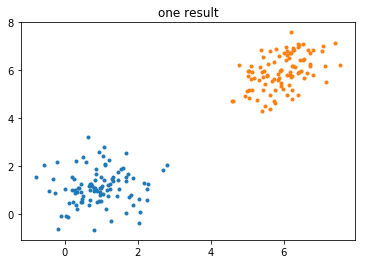

In [188]:
plt.figure()
for j in range(group_num):
    #group = [i for i in data_result if data_result[i] == j]
    group = np.array([])
    for i in range(len(data_result)):
        if data_result[i] == j+1:
            if len(group) == 0:
                group = data[i]
            else:
                group = np.vstack((group,data[i]))
    if len(group) != 0:    
        plt.plot(group[:,0],group[:,1],'.')
plt.title("one result")